# CityBikes

Send a request to CityBikes for the city of your choice. 

In [2]:
# Importing the necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
# Define a BikeStation class to represent each station
class BikeStation:
    def __init__(self, name, latitude, longitude, slots):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.slots = slots

    def to_dict(self):
        return {
            "bike_station_name": self.name,
            "bike_station_latitude": self.latitude,
            "bike_station_longitude": self.longitude,
            "number_of_bikes": self.slots
        }

    def __repr__(self):
        return f"BikeStation({self.name}, {self.latitude}, {self.longitude}, {self.slots})"

Parse through the response to get the details you want for the bike stations in that city (latitude, longitude, number of bikes). 

In [4]:
# Define a BikeNetwork class to manage all stations
class BikeNetwork:
    def __init__(self, network_id):
        self.network_id = network_id
        self.stations = []

    def fetch_data(self):
        """Fetches data from the CityBikes API and stores bike stations."""
        url = f"http://api.citybik.es/v2/networks/{self.network_id}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            self.stations = [
                BikeStation(
                    station['name'],
                    station['latitude'],
                    station['longitude'],
                    station['extra']['slots']
                )
                for station in data['network']['stations']
            ]
        else:
            print(f"Request failed with status code {response.status_code}")

    def to_dataframe(self):
        """Converts the bike stations to a Pandas DataFrame."""
        return pd.DataFrame([station.to_dict() for station in self.stations])

    def save_to_csv(self, filename):
        """Saves the bike stations to a CSV file."""
        df = self.to_dataframe()
        df.to_csv(filename, index=False)

    def visualize(self):
        """Creates an initial visualization of bike stations."""
        df = self.to_dataframe()
        df.plot(kind='scatter', x='bike_station_longitude', y='bike_station_latitude', alpha=0.5, s=100)
        plt.title('Bike Stations')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

In [5]:
# Example usage
network_id = "baksi-bisim"  # Network ID for Izmir, Turkey
bike_network = BikeNetwork(network_id)
bike_network.fetch_data()

In [6]:
# Display the first few stations
pprint(bike_network.stations[:5])

[BikeStation(İnciraltı Rekreasyon Alanı, 38.4134047464, 27.0325753524, 40),
 BikeStation(Sahilevleri 1, 38.411389, 27.013472, 40),
 BikeStation(Sahilevleri 2, 38.406137, 26.996162, 20),
 BikeStation(İnciraltı Kent Ormanı, 38.4066894063, 27.0618320135, 40),
 BikeStation(Üçkuyular İskelesi, 38.4047512791, 27.0701936867, 30)]


Put your parsed results into a DataFrame.

In [7]:
# Convert to DataFrame and save to CSV
bike_stations_df = bike_network.to_dataframe()
bike_network.save_to_csv('bike_stations.csv')

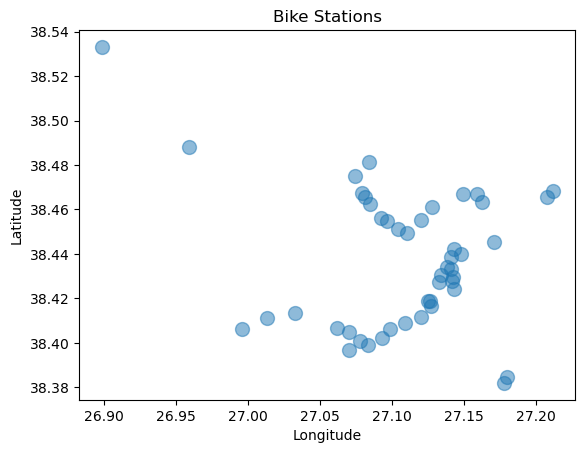

In [8]:
#Display initial visualization
bike_network.visualize()

In [9]:
# Save the figure
plt.savefig('bike_network.png')

<Figure size 640x480 with 0 Axes>